In [4]:
tree = ("ast(A,B), ast(A,C), ast(D,A), cfg(A,E), cfg(B,A), ast(B,F), ast(B,G), ast(C,H), ast(C,I), ast(J,E), ast(K,D), cfg(C,G), cfg(E,J), cfg(H,C), cfg(F,B), ast(K,J), ast(K,L), ast(M,K), cfg(I,H), cfg(G,F), cfg(J,N), cfg(L,I)")
tree

'ast(A,B), ast(A,C), ast(D,A), cfg(A,E), cfg(B,A), ast(B,F), ast(B,G), ast(C,H), ast(C,I), ast(J,E), ast(K,D), cfg(C,G), cfg(E,J), cfg(H,C), cfg(F,B), ast(K,J), ast(K,L), ast(M,K), cfg(I,H), cfg(G,F), cfg(J,N), cfg(L,I)'

In [5]:
edge_strings = tree.split(', ')

In [6]:
ast_edges = []
cfg_edges = []

for edge in edge_strings:
    edge_type = edge[0:3]
    
    start, end = edge[4:-1].split(',')
    
    if edge_type == 'ast':
        ast_edges.append(
            (start, end)
        )
    
    if edge_type == 'cfg':
        cfg_edges.append(
            (start, end)
        )

In [7]:
def make_dot_edge(edge):
    start, end = edge
    return start + " -> " + end

In [8]:
cfg_dot_edgelist = '\n'.join(map(make_dot_edge, cfg_edges))
ast_dot_edgelist = '\n'.join(map(make_dot_edge, ast_edges))

In [9]:
dot_template = """
digraph g {
   {  # AST
       edge[color=green3, constraint=true]
       """ + ast_dot_edgelist + """    
   }
   {  # CFG
       edge[color=red3, constraint=false]
       """ + cfg_dot_edgelist + """
   }
}
"""

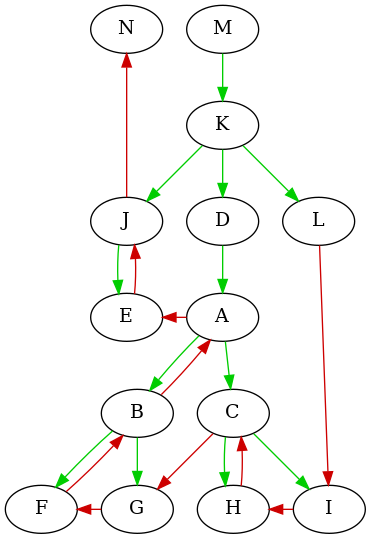

In [10]:
import subprocess

with open("../data/example_progol_rule.dot", 'w') as f:
    f.write(dot_template)

subprocess.check_call(["dot", "-O", "-Tpng","../data/example_progol_rule.dot"])
subprocess.check_call(["dot", "-O", "-Tsvg", "../data/example_progol_rule.dot"])

from IPython.display import Image
Image(filename="../data/example_progol_rule.dot.png")

In [45]:
!mv '../data/example_progol_rule.dot.png' '../images/example_progol_rule.dot.png'
!mv '../data/example_progol_rule.dot.svg' '../images/example_progol_rule.dot.svg'

In [39]:
new_tree = "ast(A,B), ast(A,C), ast(D,A), cfg(A,E), cfg(B,A), ast(B,F), ast(B,G), ast(C,H), ast(C,I), ast(J,E), ast(K,D), cfg(C,G), cfg(E,J), cfg(H,C), cfg(F,B), ast(K,J), ast(K,L), ast(M,K), cfg(I,H), cfg(G,F), cfg(J,N), cfg(L,I)"

In [40]:
new_edge_strings = map(lambda s: s.strip(" "), new_tree.split(', '))

In [41]:
new_ast_edges = []
new_cfg_edges = []

for edge in new_edge_strings:
    edge_type = edge[0:3]
    
    start, end = edge[4:-1].split(',')
    start = start.strip(" ")
    end = end.strip(" ")
    
    if edge_type == 'ast':
        new_ast_edges.append(
            (start, end)
        )
    
    if edge_type == 'cfg':
        new_cfg_edges.append(
            (start, end)
        )

In [42]:
new_cfg_dot_edgelist = '\n'.join(map(make_dot_edge, new_cfg_edges))
new_ast_dot_edgelist = '\n'.join(map(make_dot_edge, new_ast_edges))

In [43]:
new_dot_template = """
digraph g {
   {  # AST
       edge[color=green3, constraint=true]
       """ + new_ast_dot_edgelist + """    
   }
   {  # CFG
       edge[color=red3, constraint=false]
           """ + new_cfg_dot_edgelist + """
   }
}
"""

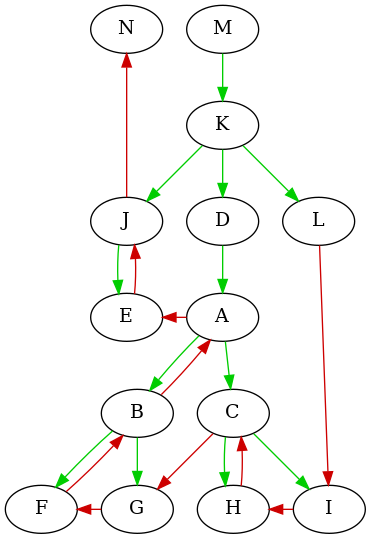

In [44]:
dot_filename = "../data/example2_progol_rule.dot"

with open(dot_filename, 'w') as f:
    f.write(new_dot_template)

subprocess.check_call(["dot", "-O", "-Tpng", dot_filename])
subprocess.check_call(["dot", "-O", "-Tsvg", dot_filename])

from IPython.display import Image
Image(filename=dot_filename+".png")

In [79]:
!mv '../data/example2_progol_rule.dot.png' '../images/example2_progol_rule.dot.png'
!mv '../data/example2_progol_rule.dot.svg' '../images/example2_progol_rule.dot.svg'

False